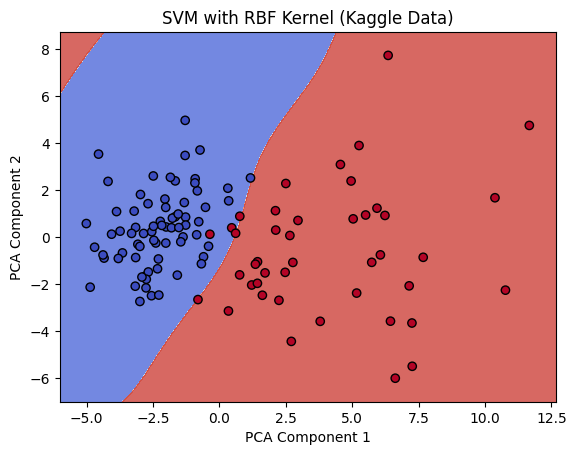

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Val Score: 0.9362637362637363
Test Accuracy: 0.9736842105263158


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Step 1: Load dataset
df = pd.read_csv("/content/breast-cancer.csv")

# Step 2: Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')


# Step 3: Encode labels (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 4: Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 8: Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Step 9: Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm, X_test, y_test, "SVM with RBF Kernel (Kaggle Data)")

# Step 10: Tune hyperparameters with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))
